In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datafile_name= "../Data/Data/cleaned_data2_csv.csv"
abt = pd.read_csv(datafile_name, index_col=0)

In [3]:
abt.columns

Index(['Country', 'City', 'Customer Name', 'Order ID', 'Postal Code', 'Region',
       'Row ID', 'State', 'Top N Customer Label', 'Order Date', 'Product ID_x',
       'Ship Date', 'Ship Mode', 'Discount', 'Profit', 'Profit Ratio',
       'Quantity', 'Sales', 'Product Name', 'Segment', 'Sub-Category', 'month',
       'Total Sales', 'Discount Amount'],
      dtype='object')

# How sales vary with quantity across different segments?


<Axes: xlabel='Quantity', ylabel='Sales'>

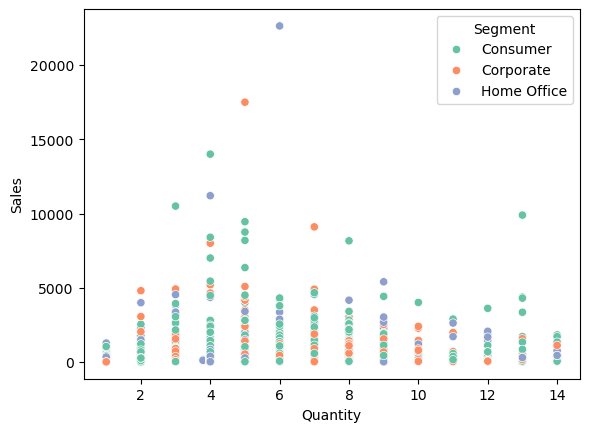

In [5]:
sns.scatterplot(data=abt, y="Sales",
x="Quantity", hue="Segment",
palette="Set2")

The scatter plot shows that as the quantity of items sold increases, the sales value also increases. 

In the Consumer segment, sales consistently increases with higher quantities, showing a steady sales pattern. 

The Corporate segment has some high sales with lower quantities, indicating possible bulk orders or high-value items. 

The Home Office segment has unpredictable buying patterns, resulting in inconsistent sales.

# How the quantity of products varies with the discount offered across different segments?

<Axes: xlabel='Discount', ylabel='Quantity'>

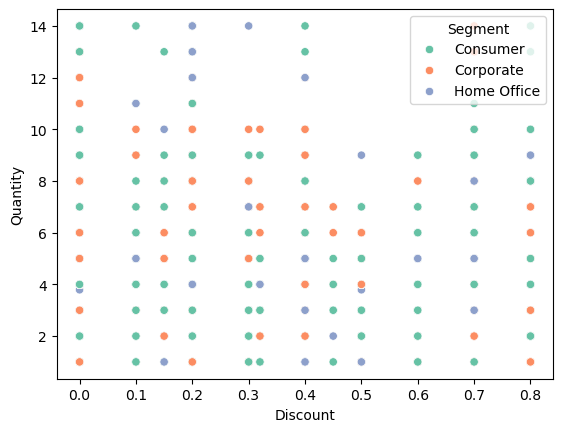

In [8]:
sns.scatterplot(data=abt, x="Discount",
y="Quantity", hue="Segment",
palette="Set2")

In the Consumer segment, higher discounts lead to higher quantities purchased, showing a clear upward trend.

The Corporate segment shows a positive response to discounts, but with more varied purchasing patterns compared to consumers.

The Home Office segment displays diverse purchasing behaviors, resulting in a more scattered relationship between discounts and quantities.

# SALES BASED ON CATEGORY: How much revenue did each sales generate from each category? → Which product category generates the most revenue? →  Which segment has the highest sales? 

By using Bar Chart

<Axes: xlabel='Segment', ylabel='Sales'>

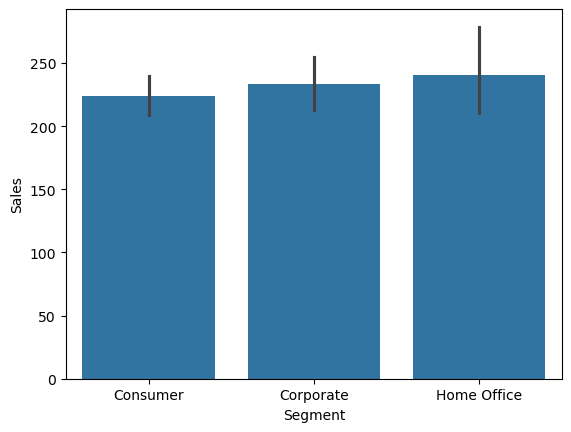

In [12]:
sns.barplot(data=abt, y="Sales",
x="Segment")

The Home Office segment shows the highest sales, indicating strong consumer demand. 

The Corporate segment has moderate sales, while the Consumer segment has the lowest sales among the three. 

This suggests that Home Office purchases drive the majority of sales, followed by corporate clients and then home office buyers.

## Which product (sub-category) is the top selling product?

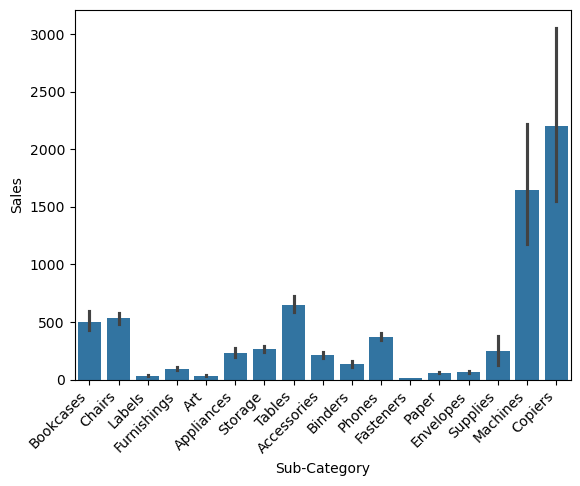

In [15]:
bar_plot=sns.barplot(data=abt, y="Sales",
x="Sub-Category")
plt.xticks(rotation=45, ha='right')
plt.show()


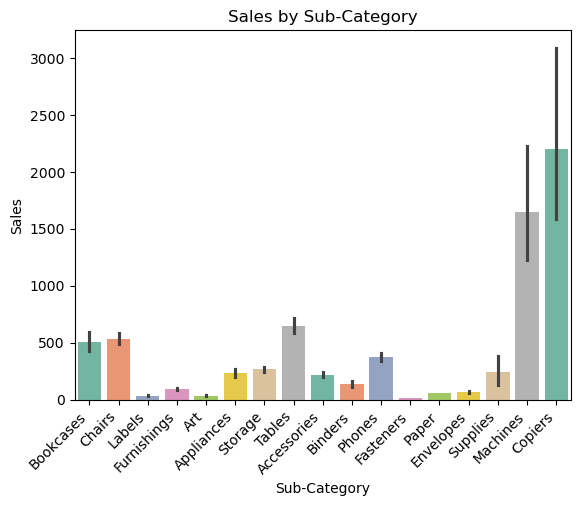

In [16]:
x = sns.barplot(data=abt, y="Sales", x="Sub-Category", hue='Sub-Category', dodge=False, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Sales by Sub-Category')
plt.legend([],[], frameon=False)
plt.show()

The graph represents the sales distribution across various sub-categories, which highlights the sales performance of different sub-categories, showcasing which ones contribute most to overall sales.

The Copiers sub category has the highest sale.

# Top 5 sub-categories of products according to their sales 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22988\2033504959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Sales', x='Sub-Category', data=top_products, palette='pastel')


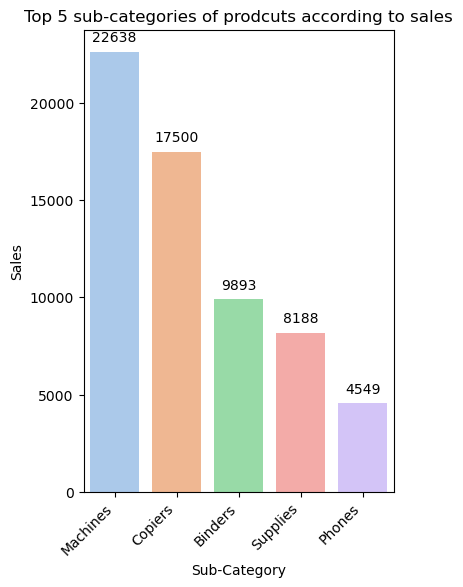

In [80]:
top_products = abt.sort_values(by='Sales', ascending=False).drop_duplicates(subset='Sub-Category').head(5) 
plt.figure(figsize=(4, 6)) 
ax = sns.barplot(y='Sales', x='Sub-Category', data=top_products, palette='pastel') 
for container in ax.containers: 
    ax.bar_label(container, fmt='%.0f', padding=5) 
plt.title('Top 5 sub-categories of prodcuts according to sales') 
plt.xticks(rotation=45, ha='right') 
plt.show()

# How does discount impact profit across different product category or segment or based on Region?

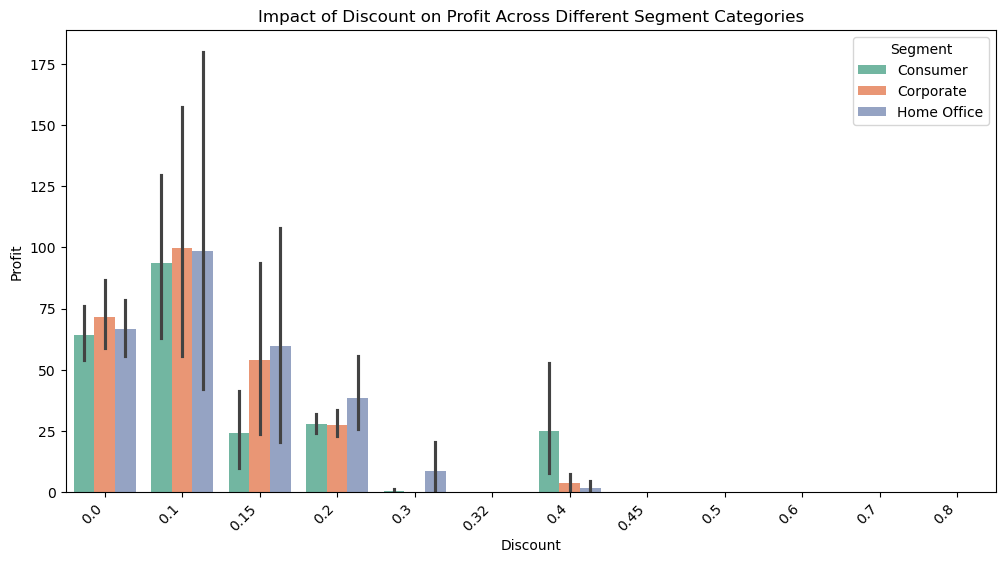

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Discount', y='Profit', hue='Segment', data=abt, palette='Set2')
plt.title('Impact of Discount on Profit Across Different Segment Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

## How does discount impact profit across different segment?

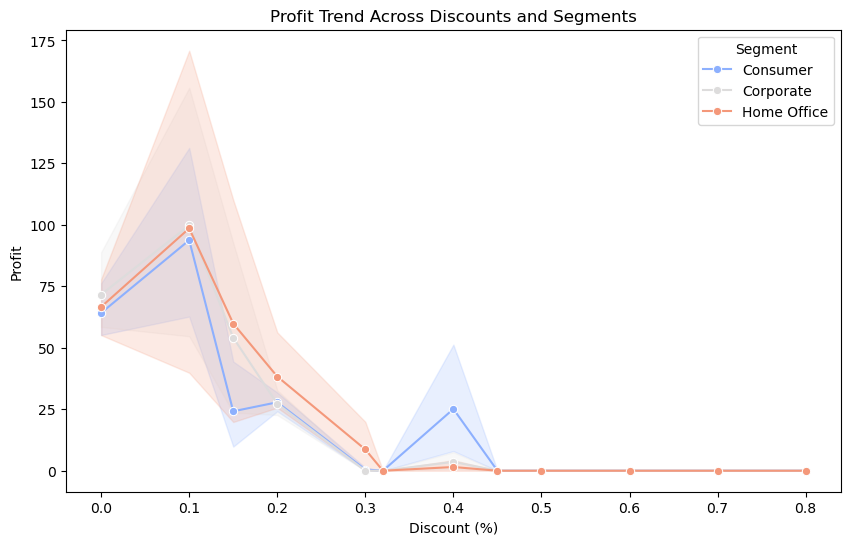

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Discount", y="Profit", hue="Segment", data=abt, marker="o", palette="coolwarm")

plt.xlabel("Discount (%)")
plt.ylabel("Profit")
plt.title("Profit Trend Across Discounts and Segments")
plt.legend(title="Segment")
plt.show()

The bar plot grid shows the impact of discounts on profit across different segments, with each segment displayed in a separate column. 

For the Consumer segment, higher discounts tend to result in increased profits, indicating that consumers respond positively to discounts. 

In the Corporate segment, the relationship between discounts and profit is mixed, with some discount levels leading to higher profits, while others have less impact. 

The Home Office segment shows a more pronounced increase in profit with higher discounts, suggesting that home office buyers are highly responsive to discounts, resulting in increased profitability

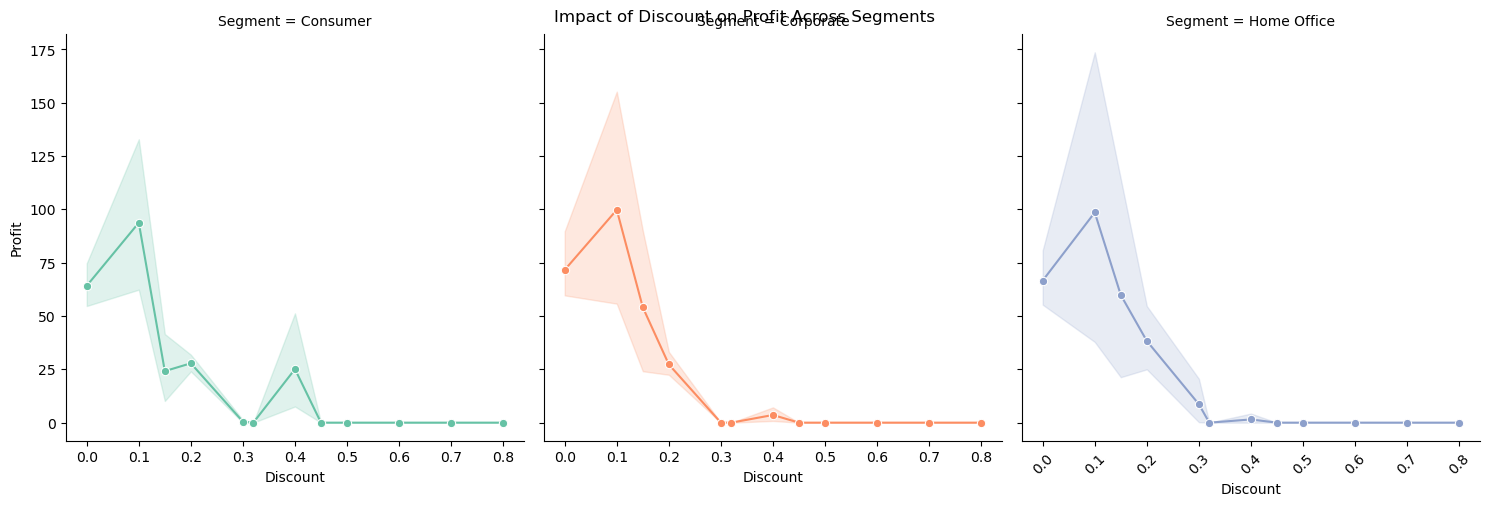

In [26]:
g = sns.FacetGrid(abt, col='Segment', hue='Segment', height=5, palette='Set2')
g.map(sns.lineplot, 'Discount', 'Profit', marker='o')

g.fig.suptitle('Impact of Discount on Profit Across Segments')
plt.xticks(rotation=45)

plt.show()

## How does discount impact profit across Region?

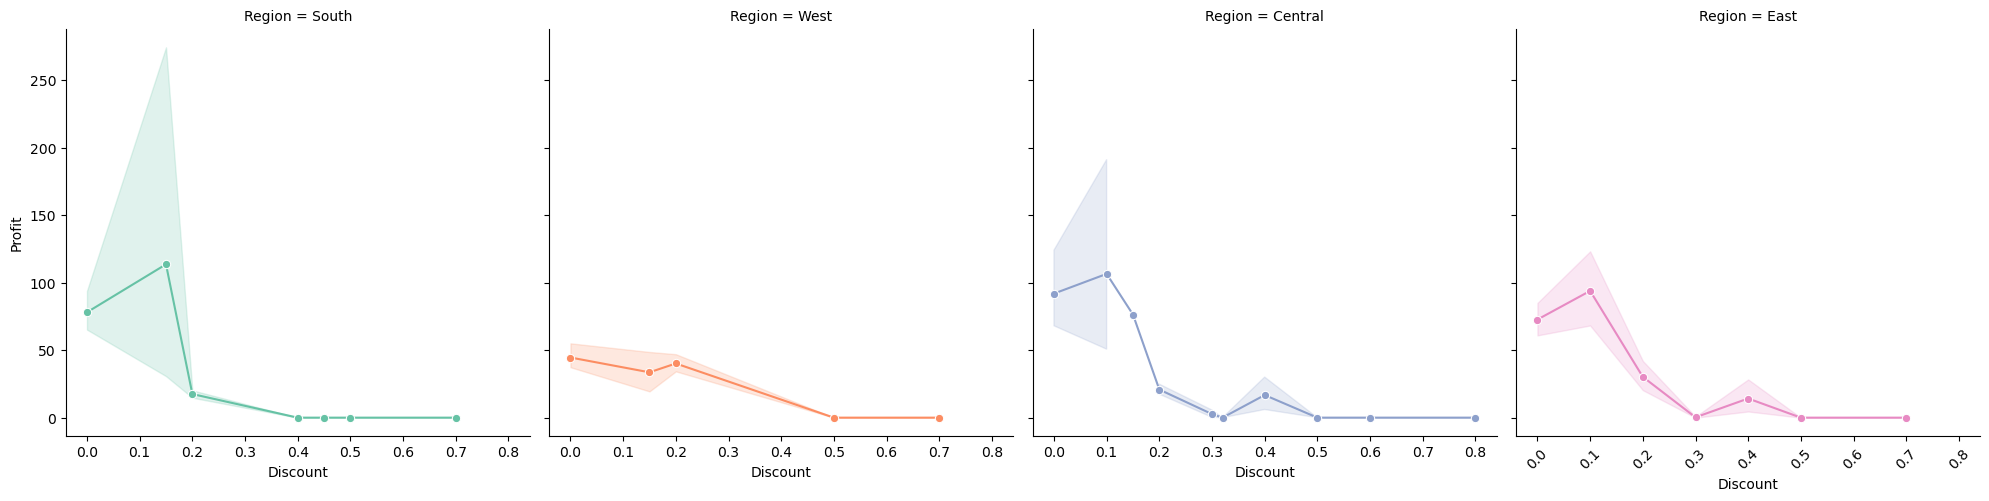

In [29]:
g = sns.FacetGrid(abt, col='Region', hue='Region', height=5, palette='Set2')
g.map(sns.lineplot, 'Discount', 'Profit', marker='o')
plt.xticks(rotation=45)
plt.show()

South: The South region exhibits fluctuating sales, with some months showing higher sales than others. Understanding the factors contributing to these fluctuations can help in stabilizing and improving sales in this region.

West: The West region shows steady sales with a gradual increase over time. This region has potential for growth, and focusing on customer engagement and expanding market reach can drive further sales improvements.

Central: The Central region shows moderate sales performance, with consistent sales throughout the year. 

East: The East region has higher sales compared to other regions, indicating a strong market presence. Continued efforts in this region can help maintain and grow this strong sales performance.

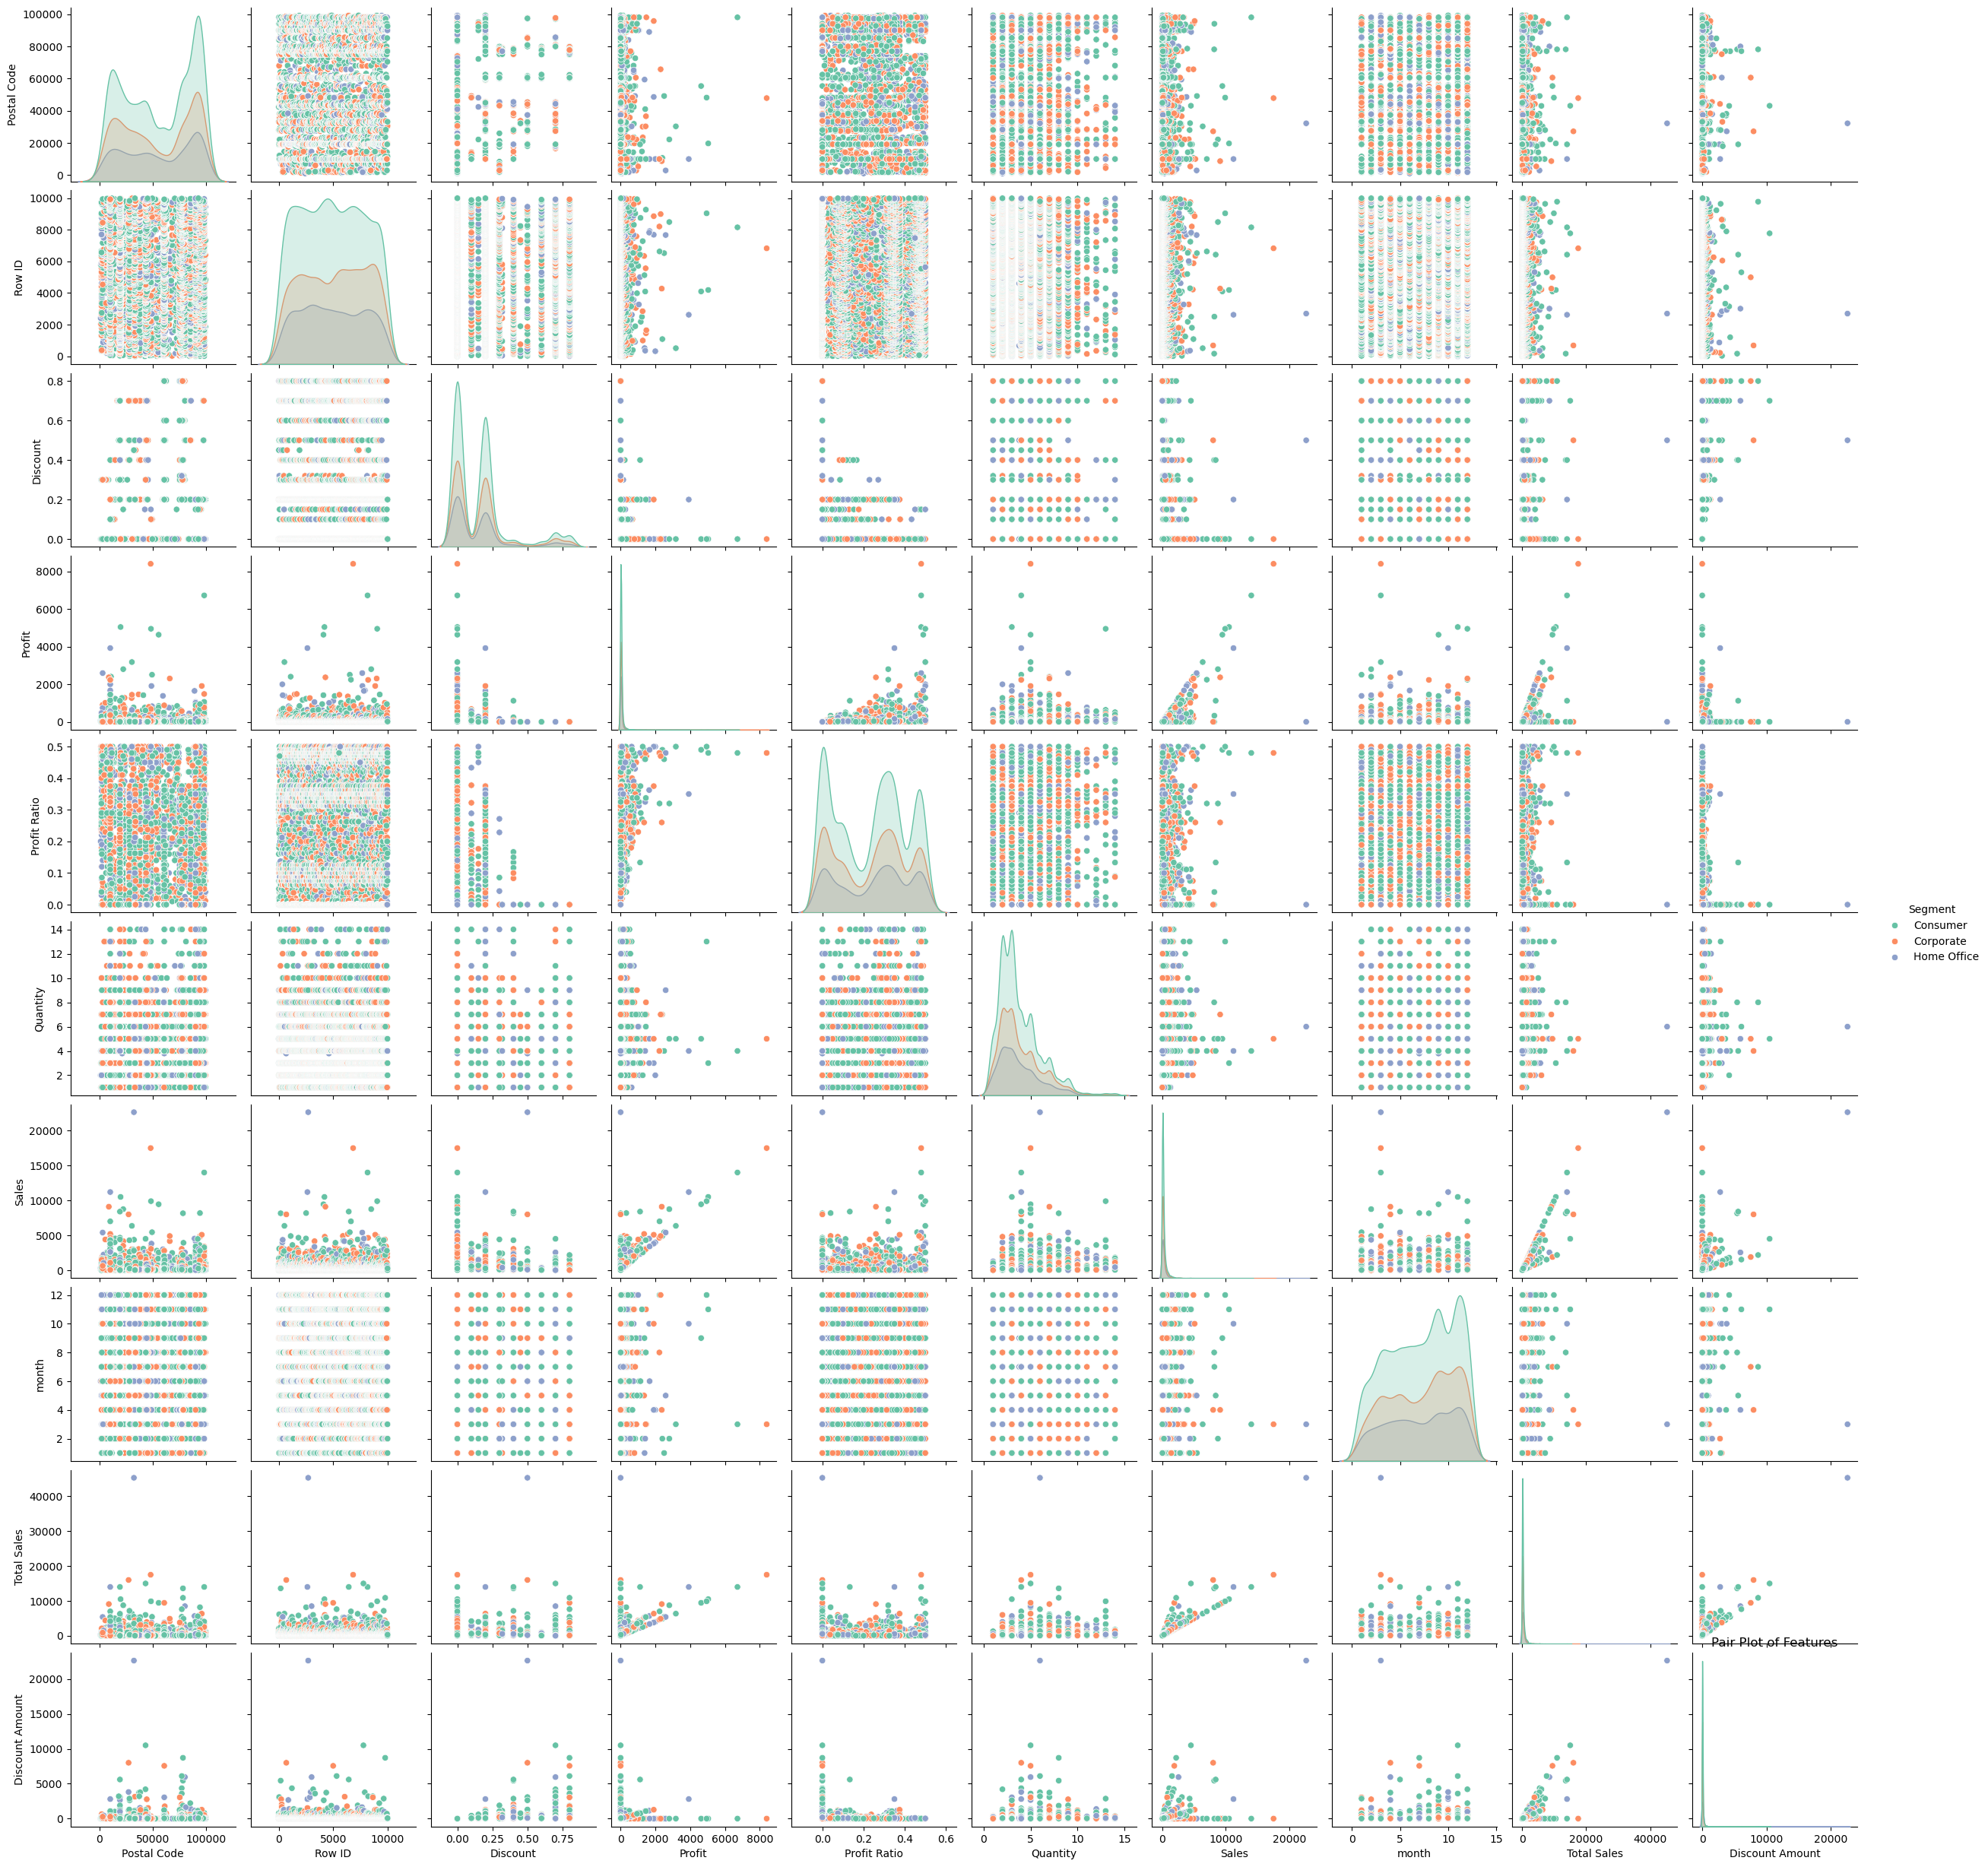

In [31]:
sns.pairplot(abt, hue='Segment', palette='Set2')
plt.title('Pair Plot of Features')
plt.show()

# Sales based on time:

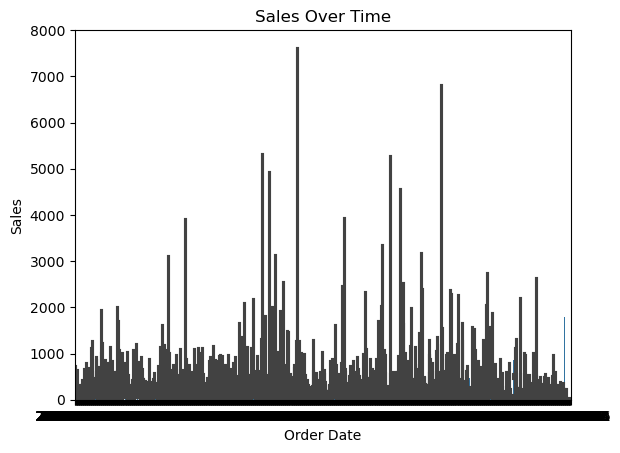

In [33]:
sns.barplot(data=abt, x='Order Date', y='Sales')
plt.title('Sales Over Time')
plt.show()

The bar plot shows how sales change over different order dates. This helps identify trends and periods of high or low sales activity. Overall, it provides insights into sales patterns over time.

The bar plot shows how sales change over different order dates. This helps identify trends and periods of high or low sales activity. Overall, it provides insights into sales patterns over time.

## How does sales vary by month?

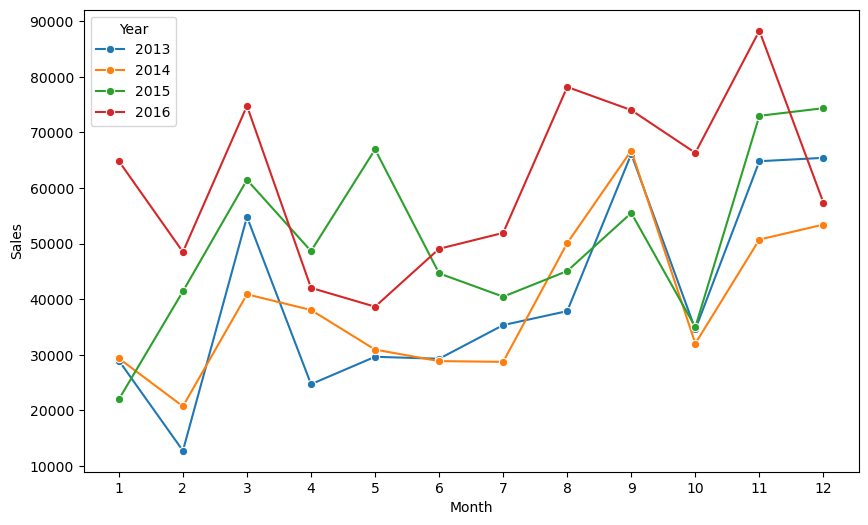

In [37]:
abt['Order Date'] = pd.to_datetime(abt['Order Date'])

# Extract year and month from the 'Order Date' column
abt['Year'] = abt['Order Date'].dt.year.astype(str)
abt['Month'] = abt['Order Date'].dt.month

# Group by year and month and calculate the total sales
monthly_sales = abt.groupby(['Year', 'Month'])['Sales'].sum().reset_index()


# Plotting the line chart for sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales, marker='o')
plt.xticks(range(1, 13))
plt.show()

The line chart shows monthly sales trends over time, with each line representing a different year, revealing seasonal patterns and fluctuations. 

It highlights periods of high and low sales activity, making it easy to compare sales performance across years.

## How does sales vary by year?

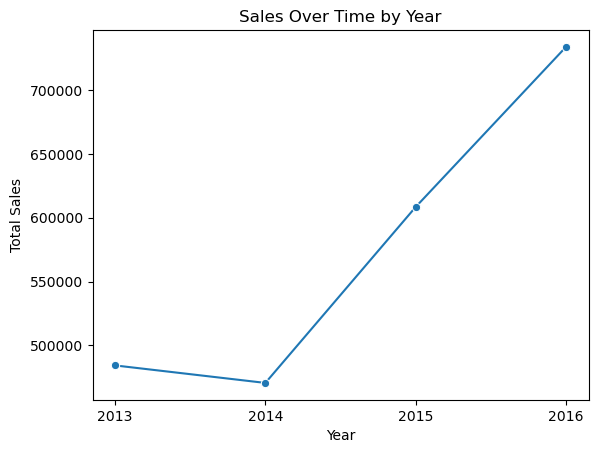

In [40]:
abt['Order Date'] = pd.to_datetime(abt['Order Date'])

# Extract year and month from the 'Order Date' column
abt['Year'] = abt['Order Date'].dt.year
yearly_sales = abt.groupby('Year')['Sales'].sum().reset_index()
sns.lineplot(x='Year', y='Sales', data=yearly_sales, marker='o')
plt.title('Sales Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales['Year']) 
plt.show()

The line chart illustrates the total sales over time, segmented by year. The chart allows us to identify whether there has been consistent growth, decline, or fluctuations in sales over the years.

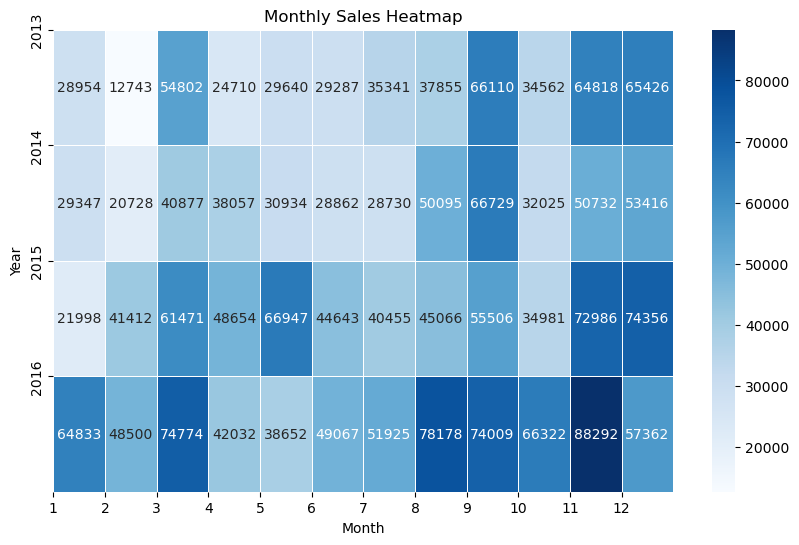

In [42]:
abt['Order Date'] = pd.to_datetime(abt['Order Date'])
abt['Year'] = abt['Order Date'].dt.year
abt['Month'] = abt['Order Date'].dt.month

# Aggregate total sales by Year and Month
sales_pivot = abt.pivot_table(index='Year', columns='Month', values='Sales', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, cmap='Blues', annot=True, fmt=".0f", linewidths=0.5)

# Formatting
plt.title('Monthly Sales Heatmap')
plt.xticks(ticks=sales_pivot.columns - 1, labels=sales_pivot.columns.astype(int))
plt.yticks(ticks=range(len(sales_pivot.index)), labels=sales_pivot.index.astype(int))

# Show plot
plt.show()

The heatmap shows total sales by month and year, with darker shades representing higher sales. It highlights peak sales periods, such as November and December, indicating the impact of the holiday season. Seasonal trends and year-over-year growth are evident, helping to identify patterns and trends

# SALES BASED ON DISCOUNT: How does the discount affect the sales? If increased, then by how much?
## What does profit ratio indicate?
## Which product has a high profit ratio?


<Axes: xlabel='Segment', ylabel='Profit Ratio'>

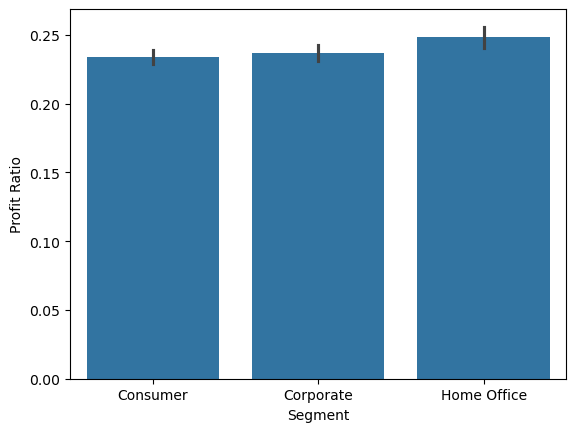

In [45]:
sns.barplot(data=abt, y="Profit Ratio",
x="Segment")

Consumer Segment: The Consumer segment shows a healthy profit ratio, indicating that consumer purchases significantly contribute to overall profitability.

Corporate Segment: The Corporate segment has a steady profit ratio, suggesting reliable and consistent profitability from corporate clients.

Home Office Segment: Profit Ratio is high, this segment is performing well with strong profitability

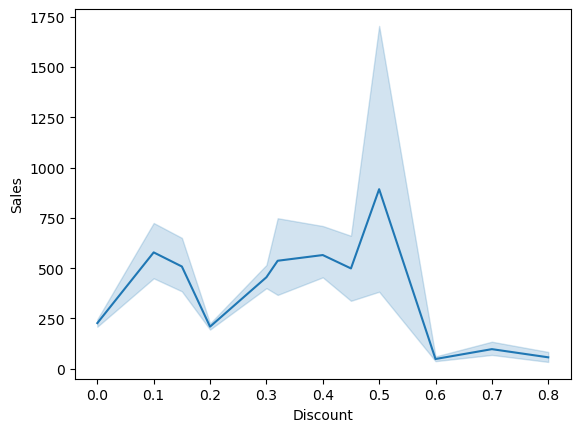

In [103]:
sns.lineplot(x='Discount', y='Sales', data=abt)
plt.show()

The line plot shows that as discount levels increase, sales also tend to increase, indicating a positive correlation between discount and sales.This suggests that offering higher discounts can effectively boost sales, attracting more customers to make purchases.

## Average Sales and Profit relationship

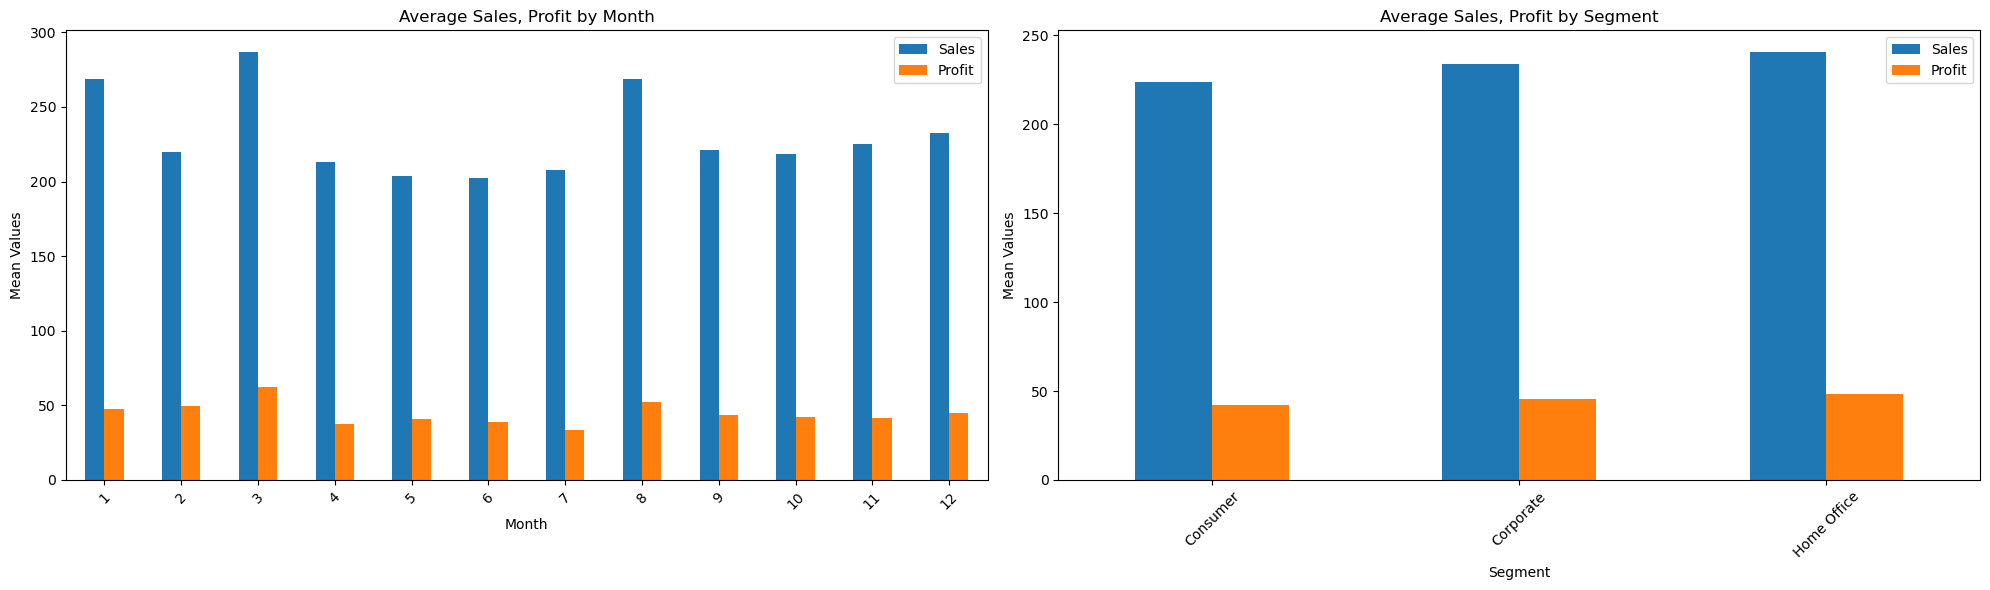

In [106]:
# Convert relevant columns to numeric (coercing errors to NaN)
abt['Sales'] = pd.to_numeric(abt['Sales'], errors='coerce')
abt['Profit'] = pd.to_numeric(abt['Profit'], errors='coerce')
abt['Discount'] = pd.to_numeric(abt['Discount'], errors='coerce')
abt['Month'] = pd.to_numeric(abt['Month'], errors='coerce')

# Drop rows with NaN values in selected columns
abt = abt.dropna(subset=['Sales', 'Profit', 'Discount', 'Month'])

# Features to analyze
features = ['Month', 'Segment']

# Create subplots
plt.figure(figsize=(20, 6))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)  # Adjusted layout for 2 features
    abt.groupby(col)[['Sales', 'Profit', ]].mean().plot.bar(ax=plt.gca())
    plt.title(f'Average Sales, Profit by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Values')
    plt.legend(['Sales', 'Profit'])
    plt.xticks(rotation=45)  # Rotate x-ticks for better readability

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


## Comparison of trend of Sales, Profit and Discount by month and by segment

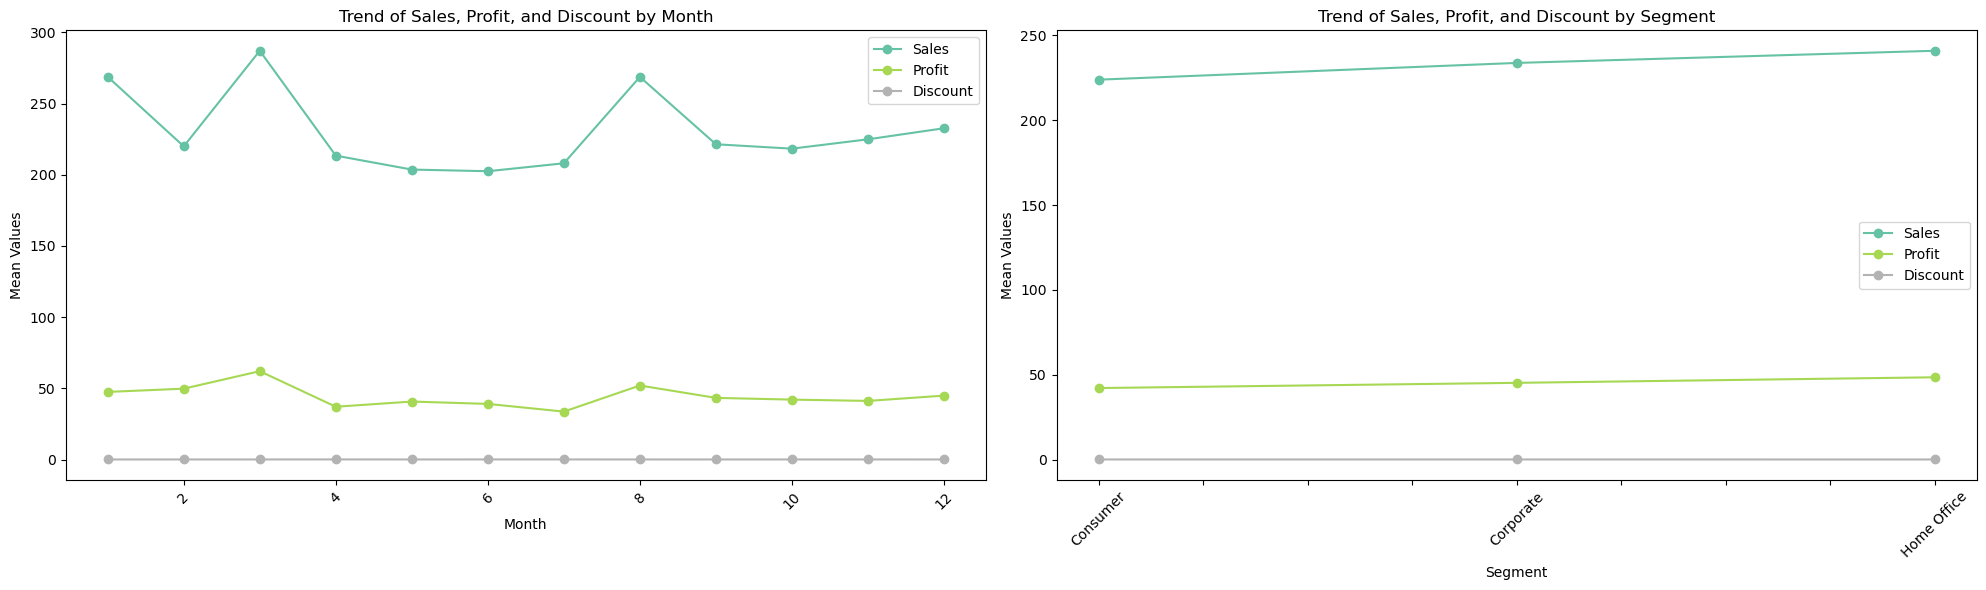

In [109]:
# Convert relevant columns to numeric (coercing errors to NaN)
abt['Sales'] = pd.to_numeric(abt['Sales'], errors='coerce')
abt['Profit'] = pd.to_numeric(abt['Profit'], errors='coerce')
abt['Discount'] = pd.to_numeric(abt['Discount'], errors='coerce')
abt['Month'] = pd.to_numeric(abt['Month'], errors='coerce')

# Drop rows with NaN values in selected columns
abt = abt.dropna(subset=['Sales', 'Profit', 'Discount', 'Month'])

# Features to analyze
features = ['Month', 'Segment']

plt.figure(figsize=(20, 6))

for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)  # 1 row, 2 columns
    grouped_data = abt.groupby(col)[['Sales', 'Profit', 'Discount']].mean()
    
    # Line plot for trends
    grouped_data.plot(marker='o', ax=plt.gca(), colormap='Set2', linestyle='-')
    
    plt.title(f'Trend of Sales, Profit, and Discount by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Values')
    plt.legend(['Sales', 'Profit', 'Discount'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Violin plot for Discount across months

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22988\4068013611.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Segment', y='Sales', data=abt, palette='coolwarm')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22988\4068013611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Month', y='Discount', data=abt, palette='coolwarm')


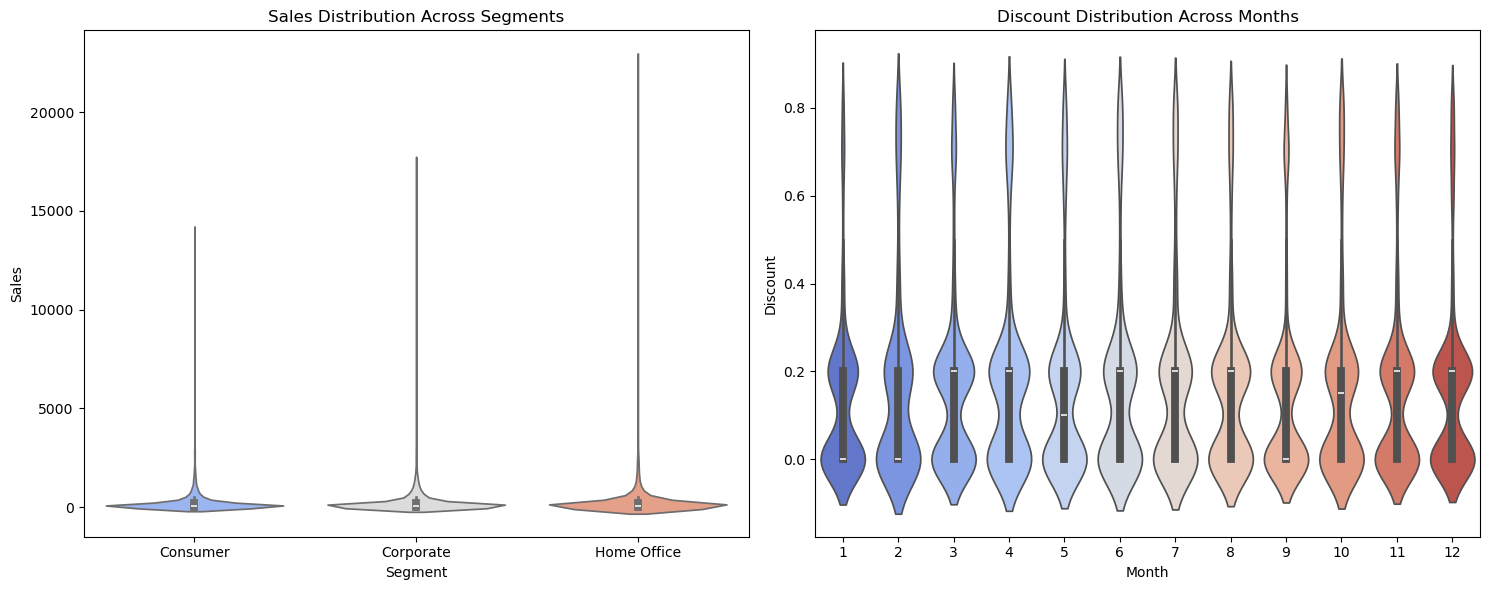

In [116]:
plt.figure(figsize=(15, 6))

# Violin plot for Sales across Segments
plt.subplot(1, 2, 1)
sns.violinplot(x='Segment', y='Sales', data=abt, palette='coolwarm')
plt.title('Sales Distribution Across Segments')

# Violin plot for Discount across Months
plt.subplot(1, 2, 2)
sns.violinplot(x='Month', y='Discount', data=abt, palette='coolwarm')
plt.title('Discount Distribution Across Months')

plt.tight_layout()
plt.show()

## Sales heatmap across Month and Segment

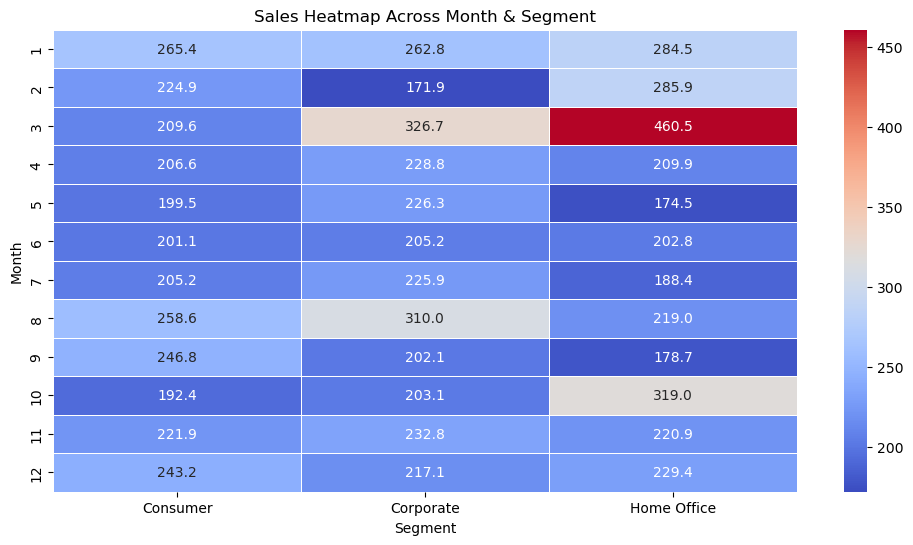

In [124]:
# Aggregate data
heatmap_data = abt.groupby(['Month', 'Segment'])[['Sales', 'Profit']].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data['Sales'], cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Sales Heatmap Across Month & Segment')
plt.xlabel('Segment')
plt.ylabel('Month')
plt.show()

## Comparison of Discount, Profit and Sales by Region

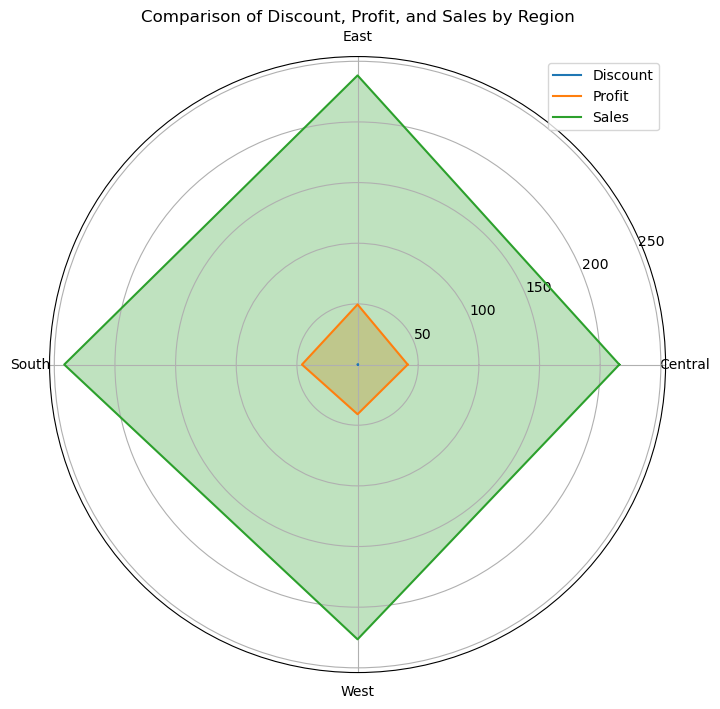

In [127]:
# Aggregate data
grouped_data = abt.groupby('Region')[['Discount', 'Profit', 'Sales']].mean()

# Normalize values for visualization
values = grouped_data.values
categories = grouped_data.index
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]), axis=0)  # Repeat first value to close the circle
angles += angles[:1]  # Close the radar chart

# Create radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
for i in range(values.shape[1]):
    ax.plot(angles, values[:, i], label=grouped_data.columns[i])
    ax.fill(angles, values[:, i], alpha=0.3)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Comparison of Discount, Profit, and Sales by Region')
plt.legend()
plt.show()


## Monthly Profit trend 

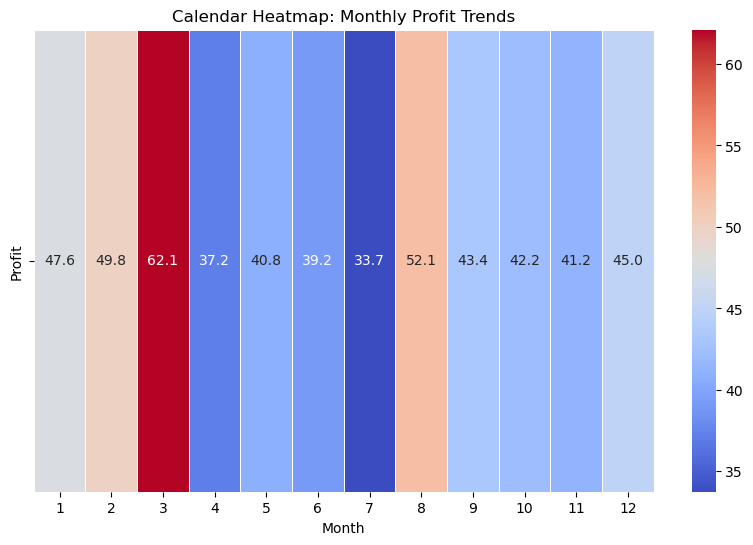

In [138]:
# Aggregate data by month
profit_by_month = abt.groupby('Month')[['Profit']].mean()

# Convert index to categorical for sorting
profit_by_month.index = profit_by_month.index.astype(int)
profit_by_month = profit_by_month.sort_index()

plt.figure(figsize=(10, 6))
sns.heatmap(profit_by_month.T, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)

plt.title("Calendar Heatmap: Monthly Profit Trends")
plt.xlabel("Month")
plt.show()

## Discount vs. Profit by Region

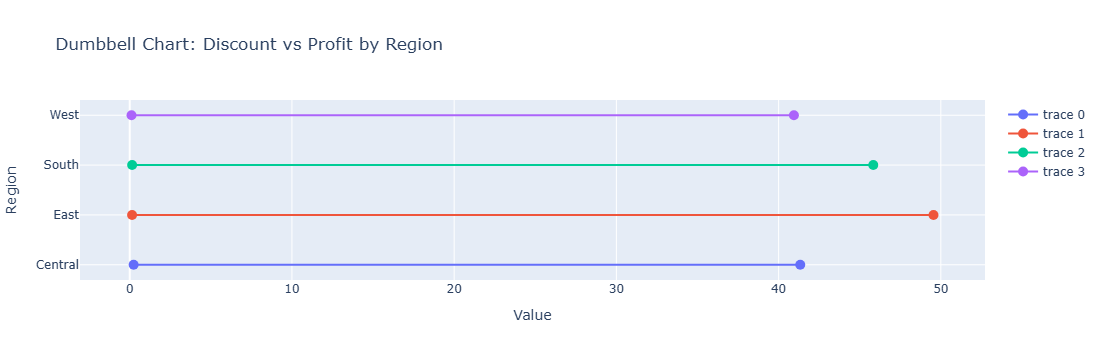

In [144]:
import plotly.graph_objects as go

grouped_data = abt.groupby('Region')[['Discount', 'Profit']].mean().reset_index()

fig = go.Figure()
for _, row in grouped_data.iterrows():
    fig.add_trace(go.Scatter(x=[row['Discount'], row['Profit']], y=[row['Region'], row['Region']], 
                             mode='lines+markers', line=dict(width=2), marker=dict(size=10)))

fig.update_layout(title="Dumbbell Chart: Discount vs Profit by Region",
                  xaxis_title="Value", yaxis_title="Region")
fig.show()

## Sales and Profit contribution based on Region

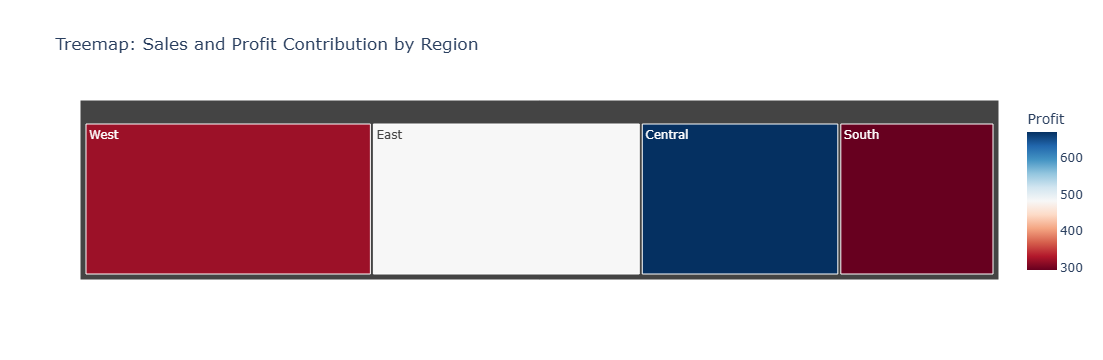

In [147]:
import plotly.express as px

fig = px.treemap(abt, path=['Region'], values='Sales', color='Profit', 
                 title="Treemap: Sales and Profit Contribution by Region",
                 color_continuous_scale='RdBu')
fig.show()

## Monthly profit trend

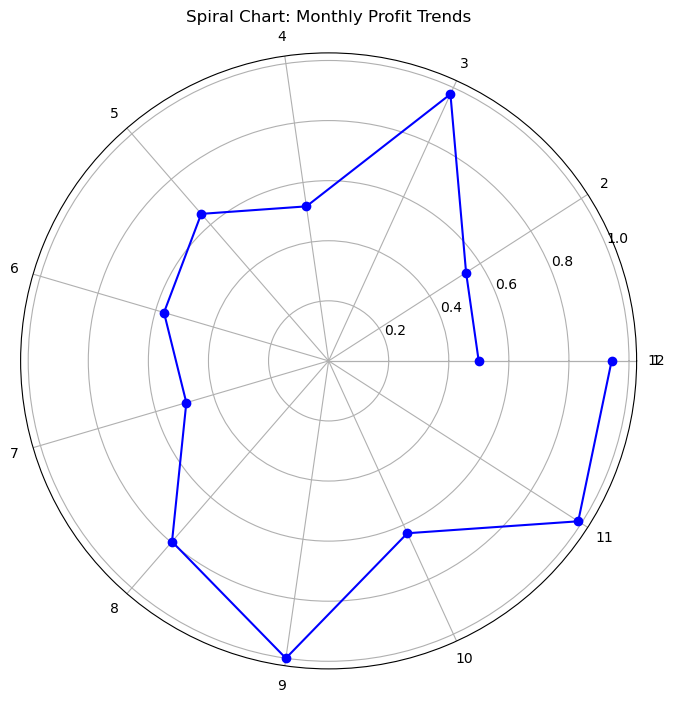

In [151]:
# Aggregate profit by month
profit_by_month = abt.groupby("Month")["Profit"].sum()

# Convert months into angles for the spiral
theta = np.linspace(0, 2 * np.pi, len(profit_by_month))

# Normalize profit values for better visualization
r = profit_by_month / profit_by_month.max()

# Plot spiral chart
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.plot(theta, r, marker='o', color='b')

# Formatting
ax.set_xticks(theta)
ax.set_xticklabels(profit_by_month.index)
ax.set_title("Spiral Chart: Monthly Profit Trends")

plt.show()


## Group data by state and segment, and calculate the total sales for each combination

             State      Segment      Sales
0          Alabama     Consumer   7537.540
1          Alabama    Corporate  10969.380
2          Alabama  Home Office   1003.720
3          Arizona     Consumer  16424.422
4          Arizona    Corporate  11736.322
..             ...          ...        ...
135  West Virginia  Home Office    536.480
136      Wisconsin     Consumer  14232.360
137      Wisconsin    Corporate  12395.630
138      Wisconsin  Home Office   5486.620
139        Wyoming  Home Office   1603.136

[140 rows x 3 columns]


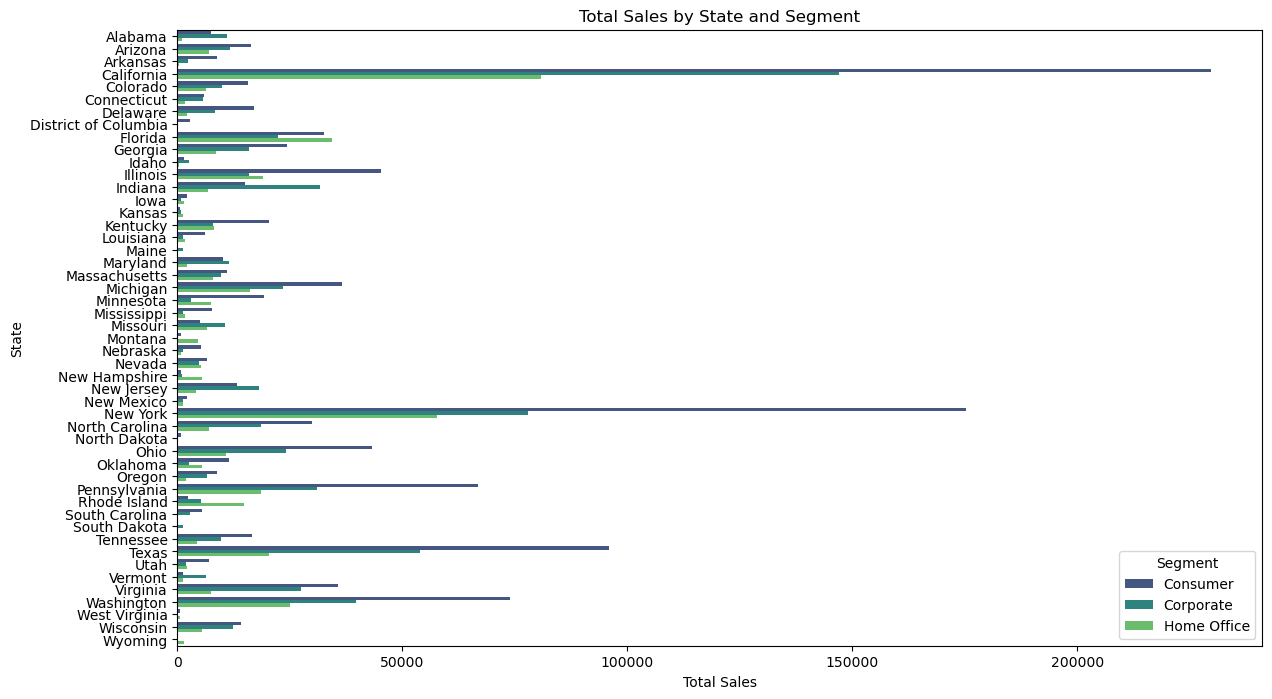

In [155]:
state_segment_sales = abt.groupby(['State', 'Segment'])['Sales'].sum().reset_index()

# Display the grouped data
print(state_segment_sales)

# Create a bar plot to visualize sales across states and segments
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='State', hue='Segment', data=state_segment_sales, palette='viridis')
plt.title('Total Sales by State and Segment')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.legend(title='Segment')
plt.show()